In [47]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

img = cv2.imread('brain.tif',0)

# Resize it to 10% of the original size to speed up the processing
img = sp.misc.imresize(img, 0.60) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
#eps = 0
graph.data = np.exp(-beta * graph.data / graph.data.std())

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS=4

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


In [48]:
graph

<23409x23409 sparse matrix of type '<class 'numpy.float64'>'
	with 116433 stored elements in COOrdinate format>

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 127.17s
Spectral clustering: discretize, 118.20s


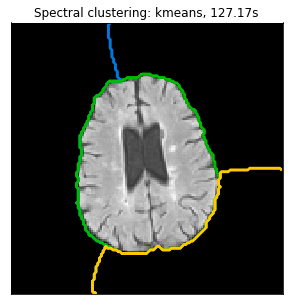

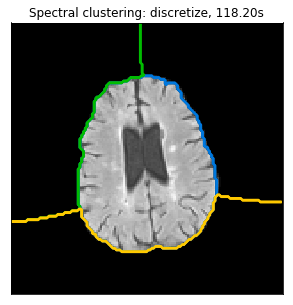

In [50]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS, assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(img.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [29]:
labels

array([[0, 3, 0, ..., 0, 3, 3],
       [0, 0, 3, ..., 3, 0, 0],
       [0, 0, 3, ..., 3, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [3, 0, 0, ..., 3, 3, 0],
       [3, 3, 0, ..., 3, 0, 0]], dtype=int64)

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


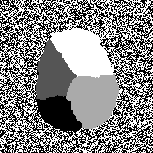

In [30]:
from numpy import array
from scipy.misc import toimage
imm=toimage(labels)
imm

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('brain.tif',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<Figure size 640x480 with 4 Axes>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('brain.tif',0)

import cv2
import numpy as np

retval, threshold = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
im_color = cv2.applyColorMap(threshold, cv2.COLORMAP_JET)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.imshow('color',im_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
max_value = 255
max_type = 4
max_binary_value = 255
trackbar_type = 'Type: \n 0: Binary \n 1: Binary Inverted \n 2: Truncate \n 3: To Zero \n 4: To Zero Inverted'
trackbar_value = 'Value'
window_name = 'Threshold Demo'
def Threshold_Demo(val):
    #0: Binary
    #1: Binary Inverted
    #2: Threshold Truncated
    #3: Threshold to Zero
    #4: Threshold to Zero Inverted
    threshold_type = cv.getTrackbarPos(trackbar_type, window_name)
    threshold_value = cv.getTrackbarPos(trackbar_value, window_name)
    _, dst = cv.threshold(src_gray, threshold_value, max_binary_value, threshold_type )
    cv.imshow(window_name, dst)
parser = argparse.ArgumentParser(description='Code for Basic Thresholding Operations tutorial.')
#parser.add_argument('--input', help='Path to input image.', default='../data/stuff.jpg')
#args = parser.parse_args()
src = cv.imread('tumor.jpg')

#im_gray = cv2.imread("tumor.jpg", cv2.IMREAD_GRAYSCALE)
#im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
if src is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
# Convert the image to Gray
src_gray = cv.applyColorMap(src, cv.COLORMAP_HSV)
cv.namedWindow(window_name)
cv.createTrackbar(trackbar_type, window_name , 3, max_type, Threshold_Demo)
# Create Trackbar to choose Threshold value
cv.createTrackbar(trackbar_value, window_name , 0, max_value, Threshold_Demo)
# Call the function to initialize
Threshold_Demo(0)
# Wait until user finishes program
cv.waitKey()